In [235]:
"""
pairing hierarchy:
number of 3 player pods
rematches
points?
Im Zweifel (bei gleicher n_3P_pods) eher den schlechten Spieler (nochmal) in den 3er Pod stecken?


Reihehenfolge der matches "rausnehmen" durch random iterations
System ist jetzt eh schon schwer nachvollziehbar. 

Tie breaker:
regualar points
oppo points
-
TODO:
makes byes possible (not for now)
generate output files for streamlit app
"""

'\npairing hierarchy:\nnumber of 3 player pods\nrematches\npoints?\nIm Zweifel (bei gleicher n_3P_pods) eher den schlechten Spieler (nochmal) in den 3er Pod stecken?\n\n\nReihehenfolge der matches "rausnehmen" durch random iterations\nSystem ist jetzt eh schon schwer nachvollziehbar. \n\nTie breaker:\nregualar points\noppo points\n-\nTODO:\nmakes byes possible (not for now)\ngenerate output files for streamlit app\n'

In [236]:
import utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [237]:
# df = pd.read_csv("Ballonfabrik mines Data for cEDH  - Command Tower.csv")
# df = pd.read_csv("Ballon Con 2 - Command Tower.csv")
# df

In [238]:
pod_config = utils.init()
ranking_method = utils.hareruya_permutations_with_draw_and_byes

# lock_players = {"": 4}

Active players 55
Pod config (4P/Byes):
(13, 3)
Finished rounds
--- 5


In [239]:
# _, sheets = hareruya_permutations(control_sheet, match_logs)
# round_permutations = list(permutations(np.arange(1, 5+1)))
# player = "C arl Mandl"
# player = "Wolfgang Obermeier"

# player_points = []
# for i, ele in enumerate(sheets):
#     player_points.append((
#         ele.loc[player, "Points"],
#         round_permutations[i]
#     ))
    


# player_points_df = pd.DataFrame(player_points, columns = ["Points", "perm"]).sort_values("Points")
# import matplotlib.pyplot as plt
# plt.hist(player_points_df.Points.values)
# plt.show()
# player_points_df

In [240]:
r1_loss = [
    # "Moritz Riegler"
]
loss_matches = []
for player in r1_loss:
    match_log_element = {}
    match_log_element["match_players"] = [player]
    match_log_element["match_result"] = "loss"
    match_log_element["round"] = 1
    match_log_element["pod"] = 0
    loss_matches.append(match_log_element)

In [241]:
loss_matches

[]

In [242]:
control_sheet = utils.get_control_sheet()
oppo_dict = utils.get_oppo_dict(control_sheet)
match_logs = utils.get_match_logs(control_sheet)
match_logs = loss_matches + match_logs
# standings_after_rounds = utils.get_standings_after_rounds(control_sheet, match_logs, oppo_dict, method=ranking_method)
control_sheet = utils.add_wld(control_sheet, match_logs)
control_sheet = utils.add_standing(control_sheet, match_logs, method=ranking_method)
control_sheet = utils.get_weighted_opp_win_percentage(control_sheet, oppo_dict)
control_sheet = utils.get_weighted_opp_win_percentage_with_draws(control_sheet, oppo_dict)

100%|██████████| 120/120 [00:02<00:00, 48.38it/s]


In [243]:
oppo_dict["Engin Harman"]

['Tobias Kuehnemund',
 'Daniel Kertesz',
 'Patrick Peters',
 'Matthias Kranz',
 'Markus Schran',
 'Daniel Seitz',
 'Moritz Names',
 'Alexander Berthold',
 'Markus Stachs',
 'Tomaz Azinhal',
 'Daniel Schneider',
 'Wutini',
 'David Kaunzner',
 'Konrad Bierlein',
 'Tino Kornitzky']

In [244]:
# match_logs
control_sheet[control_sheet.dropped != 2].sort_values("Rank", ascending=True)

,dropped,win,loss,draw,bye,Random,Points,Regular points,points_before_bye,avg_point_move,Rank,n_games,WR,weighted_oppo_WR,weighted_oppo_WR_with_draws
Player,,,,,,,,,,,,,,,
Florian,0.0,3.0,0.0,2.0,0.0,0.213257,1646.657077,17.0,1646.657077,129.331415,1,5.0,0.60,0.253521,0.303823
Markus Titze,0.0,2.0,0.0,3.0,0.0,0.232721,1409.204415,13.0,1409.204415,81.840883,2,5.0,0.40,0.208333,0.259921
Matthias Kranz,0.0,2.0,1.0,2.0,0.0,0.630277,1346.716637,12.0,1346.716637,69.343327,3,5.0,0.40,0.220588,0.260504
Markus Schran,0.0,2.0,1.0,2.0,0.0,0.306392,1338.681721,12.0,1338.681721,67.736344,4,5.0,0.40,0.263889,0.309524
Nicolas Korinek,0.0,2.0,1.0,2.0,0.0,0.472554,1331.439551,12.0,1331.439551,66.287910,5,5.0,0.40,0.208333,0.261905
Anže Jeromel,0.0,2.0,1.0,2.0,0.0,0.149159,1328.510529,12.0,1328.510529,65.702106,6,5.0,0.40,0.180556,0.228175
Alexander Berthold,0.0,2.0,1.0,2.0,0.0,0.047386,1325.617816,12.0,1325.617816,65.123563,7,5.0,0.40,0.208333,0.261905
Raphael Köhl,0.0,2.0,2.0,1.0,0.0,0.860971,1248.218584,11.0,1248.218584,49.643717,8,5.0,0.40,0.186667,0.238095
Tino Kornitzky,0.0,2.0,2.0,1.0,0.0,0.042279,1241.708101,11.0,1241.708101,48.341620,9,5.0,0.40,0.222222,0.257937


In [245]:
control_sheet[control_sheet.dropped != 2].sort_index()[["Points", "Rank",
                                                        # "weighted_oppo_WR", "weighted_oppo_WR_with_draws", "Regular points", 
                                                        "win", "loss", "draw", "bye", "dropped"]].sort_values("Rank", ascending=True)

,Points,Rank,win,loss,draw,bye,dropped
Player,,,,,,,
Florian,1646.657077,1,3.0,0.0,2.0,0.0,0.0
Markus Titze,1409.204415,2,2.0,0.0,3.0,0.0,0.0
Matthias Kranz,1346.716637,3,2.0,1.0,2.0,0.0,0.0
Markus Schran,1338.681721,4,2.0,1.0,2.0,0.0,0.0
Nicolas Korinek,1331.439551,5,2.0,1.0,2.0,0.0,0.0
Anže Jeromel,1328.510529,6,2.0,1.0,2.0,0.0,0.0
Alexander Berthold,1325.617816,7,2.0,1.0,2.0,0.0,0.0
Raphael Köhl,1248.218584,8,2.0,2.0,1.0,0.0,0.0
Tino Kornitzky,1241.708101,9,2.0,2.0,1.0,0.0,0.0


In [246]:
control_sheet[control_sheet.dropped != 2].sort_values("Rank", ascending=True).to_csv("current_standing.csv")

In [247]:
# generate next round
best_score = np.inf
best_pairings = None
next_round_number = utils.get_finished_round() + 1
print(f"Next round number: {next_round_number}")

Next round number: 6


In [248]:
for i in tqdm(range(1000)):
    pods_4P, players_byes = utils.get_heuristic_pairing(control_sheet, pod_config, oppo_dict)
    # pods_4P, pods_3P = utils.get_random_pairings(control_sheet, pod_config)
    score, rematch_counter = utils.get_pairing_scores(
        oppo_dict,
        pods_4P
    )
    if score < best_score:
        best_pairings = [pods_4P, players_byes]
        best_score = score
        print(best_score)
    if best_score == 0:
        break

  6%|▌         | 61/1000 [00:00<00:01, 599.30it/s]

3


100%|██████████| 1000/1000 [00:01<00:00, 593.90it/s]


In [249]:
# best_pairings[0]

In [250]:
paper_pairings = []
running_pod_number = 1

for pod_number, pod in enumerate(best_pairings[0]):

    for seat, player in enumerate(pod):
        paper_pairings.append(
            (
                player,
                running_pod_number,
                seat + 1,

            )
        )
    running_pod_number += 1

for seat, player in enumerate(best_pairings[1]): # these are the by players
    paper_pairings.append(
        (
            player,
            "BYE",
            0,

        )
    )

paper_pairings

[('Tim Rehusch', 1, 1),
 ('Florian Rothermel', 1, 2),
 ('Lukas Westphal', 1, 3),
 ('Markus Titze', 1, 4),
 ('Samo Pahor', 2, 1),
 ('Patrick Peters', 2, 2),
 ('Johannes Hintermaier', 2, 3),
 ('Kai Metzner', 2, 4),
 ('Julian Prokosch', 3, 1),
 ('Alexander Schulze', 3, 2),
 ('jan schmidt', 3, 3),
 ('Florian', 3, 4),
 ('Martin Aigner', 4, 1),
 ('David Da Silva Ambrosio', 4, 2),
 ('Raphael Köhl', 4, 3),
 ('Daniel Seitz', 4, 4),
 ('Even Cell', 5, 1),
 ('Kevin Baumgärtner', 5, 2),
 ('Jonas', 5, 3),
 ('Matthias Kranz', 5, 4),
 ('Markus Schran', 6, 1),
 ('Anže Jeromel', 6, 2),
 ('Tino Kornitzky', 6, 3),
 ('Stefan Meißner', 6, 4),
 ('Nicolas Korinek', 7, 1),
 ('Alexander Berthold', 7, 2),
 ('Pat', 7, 3),
 ('Tomaz Azinhal', 7, 4),
 ('Elias Bleicher', 8, 1),
 ('Leon Kratz', 8, 2),
 ('Philipp Niklas Fröbisch', 8, 3),
 ('Mai Praskalo', 8, 4),
 ('Daniel Schneider', 9, 1),
 ('Moritz Names', 9, 2),
 ('David Schönenberger', 9, 3),
 ('Mark Vale', 9, 4),
 ('David Eilert', 10, 1),
 ('Wutini', 10, 2),
 ('Da

In [251]:
paper_pairings = pd.DataFrame(paper_pairings, columns = ["Player", "Pod", "Seat"])
paper_pairings.to_csv(f"round_{next_round_number}pairings.csv", sep=";", index=False)

In [252]:
# best_pairings_flat = best_pairings[0] + best_pairings[1]
# for ele in [player for pod in best_pairings_flat for player in pod]:
#     print(ele)

In [253]:
len(paper_pairings)

55

In [254]:
top16_players = control_sheet.sort_values("Rank", ascending=True).index[:16]

top16_pairings = pd.DataFrame(index = np.arange(0,16), columns = ["Player", "Pod", "Seat"])

In [255]:
top16_pairings.loc[0] = (top16_players[0], 1, 1)
top16_pairings.loc[1] = (top16_players[7], 1, 2)
top16_pairings.loc[2] = (top16_players[8], 1, 3)
top16_pairings.loc[3] = (top16_players[15], 1, 4)
top16_pairings.loc[4] = (top16_players[1], 2, 1)
top16_pairings.loc[5] = (top16_players[6], 2, 2)
top16_pairings.loc[6] = (top16_players[9], 2, 3)
top16_pairings.loc[7] = (top16_players[14], 2, 4)
top16_pairings.loc[8] = (top16_players[2], 3, 1)
top16_pairings.loc[9] = (top16_players[5], 3, 2)
top16_pairings.loc[10] = (top16_players[10], 3, 3)
top16_pairings.loc[11] = (top16_players[13], 3, 4)
top16_pairings.loc[12] = (top16_players[3], 4, 1)
top16_pairings.loc[13] = (top16_players[4], 4, 2)
top16_pairings.loc[14] = (top16_players[11], 4, 3)
top16_pairings.loc[15] = (top16_players[12], 4, 4)


In [256]:
top16_pairings
top16_pairings.to_csv(f"top16_pairings.csv", sep=";", index=False)

In [257]:
round_dfs = []
for i in range(1,6):
    round_df = pd.read_excel("control_sheet.ods", engine="odf", sheet_name=f"round {i}")
    round_dfs.append(round_df[round_df.Pod != "BYE"])

pd.concat(round_dfs).groupby("Player").agg(["mean", "count"]).sort_values(("Seat", "mean"))

Pod        Seat      
                          mean count  mean count
Player                                          
Martin Aigner             2.00     4  1.00     4
Samo Pahor                2.00     4  1.25     4
Daniel Siegert            9.20     5  1.40     5
Philipp Unterberger       6.80     5  1.60     5
Tim Rehusch               1.25     4  1.75     4
Daniel Kertesz            8.60     5  1.80     5
Alexander Schulze        10.50     4  2.00     4
David Da Silva Ambrosio   5.50     4  2.00     4
Daniel Schneider          5.20     5  2.20     5
Nicolas Korinek           5.40     5  2.20     5
David Eilert              7.40     5  2.20     5
Konrad Bierlein           8.80     5  2.20     5
Leon Kratz                7.00     5  2.20     5
Stefan Meißner            5.20     5  2.20     5
Florian                   2.80     5  2.20     5
Josef Horn                8.80     5  2.20     5
Kevin Baumgärtner        10.00     4  2.25     4
Julian Prokosch           3.50     4  2.25     4
Lukas Westphal            3.00     4  2.25     4
Markus Schran             3.20     5  2.40     5
Pat                       8.40     5  2.40     5
Markus Titze              3.80     5  2.40     5
Moritz Names              9.40     5  2.40     5
Moritz Riegler           10.00     5  2.40     5
Mark Vale                 9.20     5  2.40     5
Sebastian Basler          6.80     5  2.40     5
Alexander Berthold        7.80     5  2.40     5
David Schönenberger       6.80     5  2.40     5
Anže Jeromel              6.60     5  2.40     5
Tobias Kuehnemund         9.40     5  2.40     5
Elias Bleicher            5.40     5  2.40     5
Mai Praskalo             10.20     5  2.40     5
Even Cell                 3.00     4  2.50     4
Raphael Köhl              7.60     5  2.60     5
Paskal Majer             10.00     5  2.60     5
David Kaunzner            4.60     5  2.60     5
Philipp Niklas Fröbisch  10.00     5  2.60     5
Markus Haupenthal         8.60     5  2.60     5
Matthias Kranz            4.00     5  2.60     5
Kai Metzner               9.00     4  2.75     4
Daniel Seitz              6.20     5  2.80     5
Tomaz Azinhal             5.20     5  2.80     5
Wolfgang Obermeier       10.60     5  2.80     5
Tino Kornitzky            7.40     5  3.00     5
Marciel Körber            8.20     5  3.00     5
Jonas                     8.25     4  3.00     4
Johannes Hintermaier      6.50     4  3.00     4
Engin Harman              5.40     5  3.00     5
jan schmidt               2.50     4  3.25     4
Wutini                    8.60     5  3.40     5
Philipp Borst            11.20     5  3.40     5
Patrick Peters            7.50     4  3.50     4
Bart Levstek              8.80     5  3.60     5
Florian Rothermel         9.00     4  3.75     4
Markus Stachs             8.60     5  3.80     5

(array([ 2.,  1.,  3.,  2., 11., 20.,  4.,  5.,  4.,  3.]),
 array([1.  , 1.28, 1.56, 1.84, 2.12, 2.4 , 2.68, 2.96, 3.24, 3.52, 3.8 ]),
 <BarContainer object of 10 artists>)

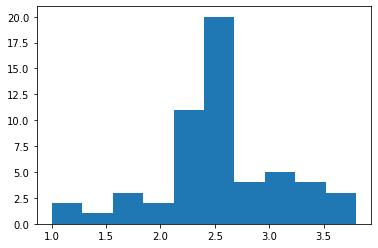

In [258]:
import matplotlib.pyplot as plt
plt.hist(pd.concat(round_dfs).groupby("Player").agg(["mean", "count"])[("Seat", "mean")].values)

In [259]:
joined = control_sheet.join(pd.concat(round_dfs).groupby("Player").agg(["mean", "count"])[[("Seat", "mean")]].T.reset_index(drop=True).T)

<AxesSubplot:xlabel='0', ylabel='Points'>

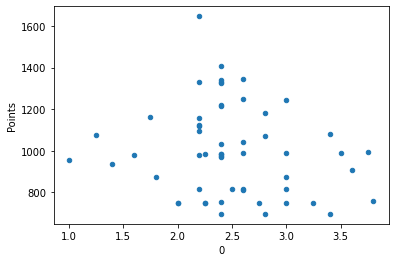

In [261]:
joined.plot(x=0, y="Points", kind="scatter")

In [267]:
joined["avg_seat"] = joined[0]

<AxesSubplot:xlabel='avg_seat', ylabel='Points'>

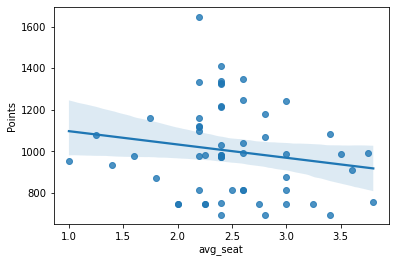

In [268]:
import seaborn as sns
sns.regplot(data=joined, x="avg_seat", y="Points")

i